In [1]:
!pip install geopandas

In [2]:
import geopandas as gpd
print(gpd.__version__)
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

0.10.2


/usr/local/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [4]:
cities.tail()

,name,geometry
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)
201,Singapore,POINT (103.85387 1.29498)


## 시각화
- 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_te

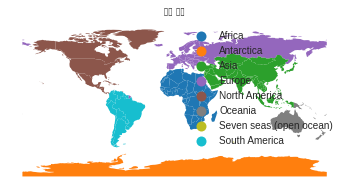

In [5]:
ax = countries.plot(column = "continent", legend = True, categorical = True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

- 실수형 데이터를 표현하고싶다면, 데이터를 구분하는 방법과 개수를 정의할 수 있다.
- `scheme` 인자로 설정하는데, 지원되는 것으로는 "Equal_interval"(동일한 간격으로 구분), "Quantiles"(4분위수를 구하여 구분), "Fisher_Jenks"(클래스 내 분산을 줄이고, 클래스끼리의 분산을 최대화하는 방식으로 구분)가 있다. 구분하는 개수는 `k`인자에 원하는 숫자를 입력하면 된다.

In [6]:
!pip install mapclassify>=2.4.0

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_

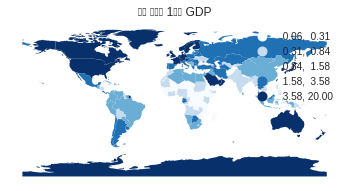

In [7]:
# 1인당 GDP 계산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column = 'gdp_per_cap', legend = True, scheme = 'quantiles', cmap = 'Blues', k = 5)
ax.set_title("세계 국가의 1인당 GDP")
ax.set_axis_off()
plt.show()

## Geometry  데이터
- `Shapely`라는 패키지를 통해 **Geometry 데이터를 처리**한다. 

### Polygons
- 한 국가의 영토 따위 등은 여러 개의 점을 이은 다각형으로 나타낼 수 있다. 

In [8]:
countries.geom_type

0      MultiPolygon
1           Polygon
2           Polygon
3      MultiPolygon
4      MultiPolygon
           ...     
172         Polygon
173         Polygon
174         Polygon
175         Polygon
176         Polygon
Length: 177, dtype: object

### Points
- 어떤 사건이 발생한 위치, 한 국가의 수도, 두 국가간의 중앙점 등은 하나의 좌표로 나타낼 수 있다. 

In [9]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_

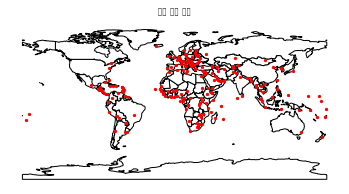

In [10]:
base = countries.plot(color = 'white', edgecolor = 'k')
ax = cities.plot(ax = base, marker = 'o', color = 'red', markersize = 5)
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

### LineString
- 점과 점을 이은 것은 선이 된다. 두 도시 사이의 길, 강의흐름, 국경의 생김새, 경계면 정보 등을 선으로 나타낼 수 있다. 다음 코드는 우리나라의 육지를 선으로 나타낸 것이다. 여기서 사용되는 `squeeze()`함수는 geopandas 객체에서 Geometry 데이터만을 추출해주는 기능을 한다. 

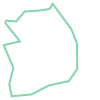

In [11]:
korea_border = countries[countries.name == 'South Korea'].geometry

korea_border.boundary.squeeze()

## Geometry 데이터의 속성
- 지리 정보의 속성
    - `area` : 넓이
    - `boundary` : 테두리
    - `centroid` : 중앙지점

- 그리고 두 geometry 간의 거리를 계산해주는 함수 또한 유용하게 사용된다.
    - `distance` : 두 점 사이의 거리

- 넓이, 거리는 우리가 흔히 사용되는 제곱미터, 마일, 킬로미터 등의 단위를 사용하는 것이 아니다. 그래서 같은 객체 안에서의 비교만 가능하다.

# Geopandas의 지리 데이터 간의 관계 연산

- geopandas는 지리데이터 간의 관계를 연산해주는 기능을 가지고 있다. 관계를 연산한다는 말은, 두 데이터가 교차하는지, 하나가 다른 하나의 내부에 있는지 등을 말한다.

- 좌표 데이터를 `Shapely`의 `Geometry` 자료형으로 만들면, 불러온 데이터셋을 이용해, 어떤 도시가 어느 나라 안에 있는지, 도시까지의 거리는 얼마나 되는지, 어떤 도시가 두 도시 사이에 존재하는지 등의 관계를 알 수 있다.

## 관계 연산 예제

- 지리적 관계에 대한 경우의 수는 매우 많이 때문에, 간단한 예제를 통해 기본적인 관계연산을 알아보자.

- 동북아시아의 주요 국가와 도시를 각각 선과 점으로 나타내고, 도시들을 이어주자.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

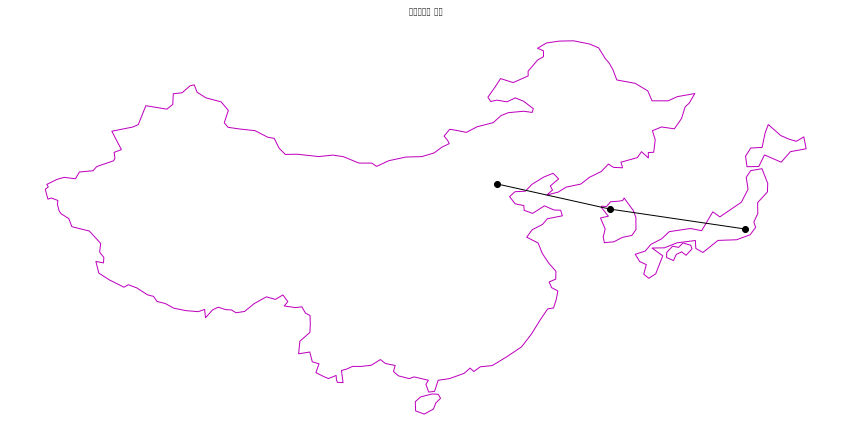

In [12]:
 from shapely.geometry import Point, Polygon, LineString

 northern_asia = countries.loc[countries['name'].isin(['South Korea', 'China', 'Japan'])]
 base = northern_asia.plot(figsize = (15, 15), color = 'w', edgecolor = 'm')

 # 도시 geometry 정보
 seoul = cities.loc[cities.name == 'Seoul', 'geometry'].squeeze()
 beijing = cities.loc[cities.name == 'Beijing', 'geometry'].squeeze()
 tokyo = cities.loc[cities.name == 'Tokyo', 'geometry'].squeeze()

# 라인 ㅓㅈㅇ의
line = LineString([beijing, seoul, tokyo])

# 시각화
ax = gpd.GeoSeries([seoul, beijing, tokyo, line]).plot(ax = base, color = 'k', edgecolor = 'k', lw = 1)
ax.set_title("동북아시아 지도")
ax.set_axis_off()
plt.show()

## 기본적인 관계 연산 함수
출력값은 boolean 값이다.
- 기본 관계 연산
    - `within` : 지리적으로 포함되는지 여부
    - `contains` : 지리적으로 포함하고 있는지 여부
    - `intersects` : 지리적으로 교차하는지 여부, 두 지리가 경계선만 닿아있어도, True를 반환
    - `crosses` : 지리적으로 교차하는지 여부, intersects와 차이점은 crosses는 내부를 지나가야만 True를 반환한다는 것.

In [13]:
## 나라의 geometry 정보를 squeeze() 함수로 빼옴
korea = countries.loc[countries['name'] == 'South Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()
japan = countries.loc[countries['name'] == 'Japan', 'geometry'].squeeze()

# 서울은 한국 안에 있다.
seoul.within(korea)

True

In [14]:
korea.contains(seoul)

True

In [15]:
# 중국과 한국의 국경은 맞닿아 있지 않다.
china.intersects(korea)

False

In [16]:
# 홍콩, 베이징, 도쿄, 서울을 잇는 선은 한국을 지나간다.
line.crosses(korea)

True

In [17]:
# 데이터 검색도 가능

countries[countries.contains(seoul)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.768955


## 속성을 이용한 연산

In [18]:
# 서울에서 베이징까지의 거리
seoul.distance(beijing)

10.871264032732043

In [19]:
# 한국의 면적과 중국면적의 비율
china.area / korea.area

95.89679828612043

In [20]:
# 한국으로부터 서울과 베이징간의 거리보다 가까운 데이터 검색

countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...",2.632550
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.768955
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",3.900313


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_

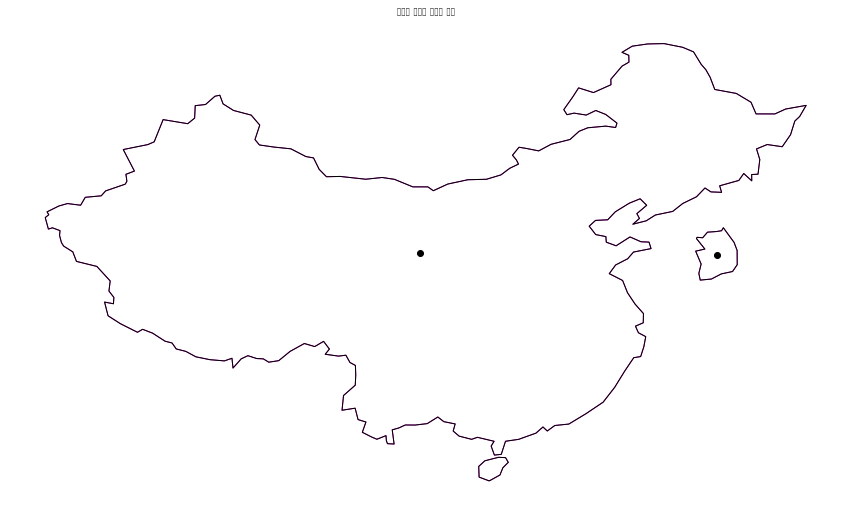

In [21]:
## 한국과 중국의 지리적 중심 표시
base = northern_asia[northern_asia.name != 'Japan'].plot(
    figsize = (15, 15), color = 'w', edgecolor = 'm'
)

ax = gpd.GeoSeries([china.boundary, korea.boundary, china.centroid, korea.centroid]).plot(
    ax = base, color = 'k', edgecolor = 'k', lw = 1)
ax.set_title('중국과 한국의 지리적 중심')
ax.set_axis_off()
plt.show()

# 지리정보 조작
- 다음 나열된 함수들은 지리정보를 변환하는 기능을 가진다.
    - `convex_hull`
        - polygon 데이터의 convex hull을 그린다.
    - `envelope`
        - polygon 데이터를 감싸는 가장 작은 사각형을 그린다.
    - `simplify(tolerance, preserve_topology = True)`
        - Polygon 데이터에 대해 컨투어 추정을 한다.
    - `unary_union`
        - 여러개의 geometry 데이터의 합집합을 구한다.
        - polygon 내에 빈 곳이 있는 경우, unary_union가 실행되지 않는다. 이때는 buffer() 명령으로 polygon의 빈 곳을 채워준 후 사용한다.
    - `buffer`(distance, resolution = 16)
        - point, linestring 데이터에 실행하면 주어진 거리 내의 모든 점을 이어 polygon 데이터를 만들고,  polygon에 적용하면 주어진 거리만큼 확장한다.

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
seoul_file = "/content/drive/MyDrive/geodata/TL_KODIS_BAS.shp"
seoul = gpd.read_file(seoul_file, encoding = 'euckr')
seoul.tail(3)

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
5662,0.266464,05414,1174000215,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,None
5663,0.129090,05415,1174000216,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,None
5664,0.127814,05416,1174000217,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,None


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

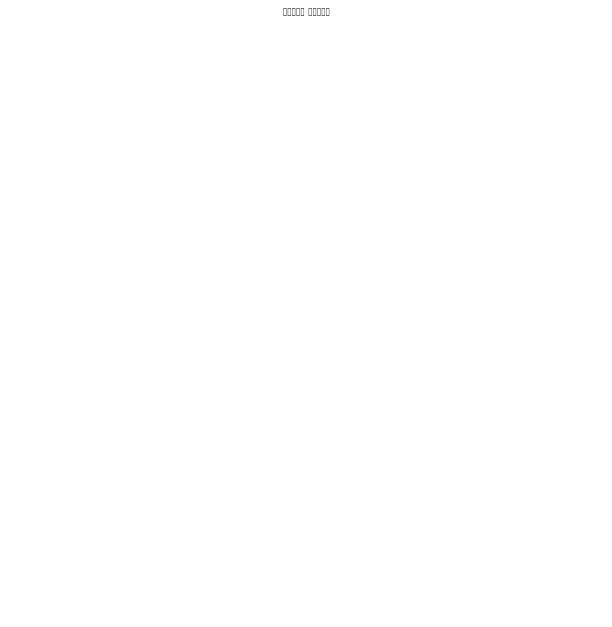

In [24]:
ax = seoul.plot(figsize = (11, 11), color = 'w', edgecolor = 'k')
ax.set_title("서울특별시 기초구역도")
ax.set_axis_off()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text

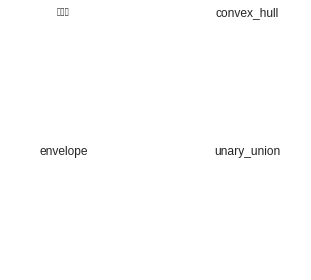

In [25]:
# 동작구의 기초 구역도를 convex_hull, envelope, unary_union을 이용해 변환하는 예

sample = seoul[seoul.SIG_KOR_NM == "동작구"]

ax = plt.subplot(2, 2, 1)
sample.plot(color = 'k', edgecolor = 'w', ax = ax)
ax.set_title("동작구")
ax.set_axis_off()

ax = plt.subplot(2, 2, 2)
sample.convex_hull.plot(color = 'k', edgecolor = 'w', ax = ax)
ax.set_title("convex_hull")
ax.set_axis_off()

ax = plt.subplot(2, 2, 3)
sample.envelope.plot(color = 'k', edgecolor = 'w', ax = ax)
ax.set_title("envelope")
ax.set_axis_off()

ax = plt.subplot(2, 2, 4)
gpd.GeoSeries([sample.geometry.buffer(0.1).unary_union]).plot(ax = ax, color = 'k', edgecolor = 'w')
ax.set_title("unary_union")
ax.set_axis_off()

plt.tight_layout()
plt.show()

## GeoDataFrame 또한 Pandas DataFrame의 groupby 명령과 같은 그룹핑 기능을 제공한다.

- Dissolve
- GeoDataFrame 내의 geometry를 그룹 별로 unary_union을 이용해 geometry 데이터를 합친다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_

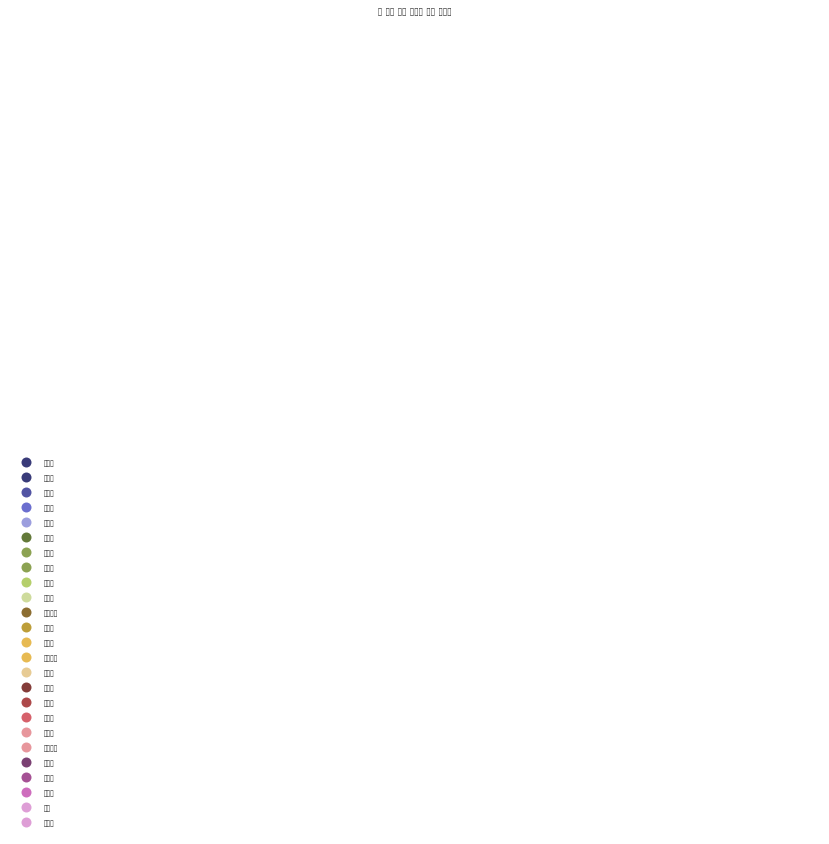

In [26]:
seoul.geometry = seoul.buffer(0.001)
seoul = seoul.dissolve(by = 'SIG_CD')
ax = seoul.plot(figsize = (15, 15), column = 'SIG_KOR_NM', categorical = True,
                cmap = 'tab20b', edgecolor = 'k', legend = True, legend_kwds = {'loc' : 3})
ax.set_title("구 별로 묶은 서울의 기초 구역도")
ax.set_axis_off()
plt.show()

# GeoPandas의 좌표계

## 좌표계
좌표계는 지구라는 곡면을 2차원 데이터로 표현하는 방법론을 의미한다. GeoPandas 데이터라면, crs속성값으로 확인할 수 있다. 좌표계가 다른 데이터의 경우, 좌표간의 거리나 위치 등이 다르게 표현되기 때문에 반드시 통일시켜주어야한다. 
- WGS84(EPSG:4326): GPS가 사용하는 좌표계(경도와 위도)

- Bessel 1841(EPSG:4004): 한국과 일본에 잘 맞는 지역타원체를 사용한 좌표계

- GRS80 UTM-K(EPSG:5179): 한반도 전체를 하나의 좌표계로 나타낼 때 많이 사용하는 좌표계. 네이버 지도

- GRS80 중부원점(EPSG:5181): 과거 지리원 좌표계에서 타원체 문제를 수정한 좌표계. 다음카카오 지도

- Web mercator projection(Pseudo-Mercator, EPSG:3857) : 구글지도/빙지도/야후지도/OSM 등 에서 사용중인 좌표계

- Albers projection(EPSG:9822) : 미국 지질 조사국에서 사용하는 좌표계

GeoPandas는 좌표계 변환 기능을 `to_crs()`라는 함수로 제공한다. 다음 코드는 " epsg:4326"에서 "epsg:3857"로 변환한다. 다음 코드의 시각화된 결과를 보면, 남극이 찢어져 있는 것을 볼 수 있다. “epsg:3857”, Web mercator projection은 내부적으로 계산이 간단하고 빠르다는 장점이 있지만, 북위 85도, 남위 85도 이상의 지역, 즉 극지방에 대해서는 정보 왜곡이 심하다. 남극 부분이 왜곡된 것은 이 때문이다.

In [27]:
countries.crs

# epsg:4326

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
# 이전의 좌표계와 비교해보자.
countries_mercator = countries.to_crs(epsg = 3857)

print(countries_mercator.geometry[113])

POLYGON ((2614241.130436479 7153601.785967645, 2619073.309504622 7070435.576908916, 2649953.2347877226 6999613.069934945, 2649314.6968394318 6926062.815965136, 2582555.8419753523 6888660.742470466, 2616898.8289239593 6804402.184097363, 2619021.536157463 6724260.516108001, 2675005.7822184064 6569348.0703989, 2663069.1494012605 6520185.512981648, 2607826.9879829274 6499876.023004115, 2506742.403952631 6356150.531597702, 2535459.3538433225 6279511.087609827, 2511160.3962435066 6289421.884152675, 2405370.1902158973 6355008.512342296, 2325236.554002487 6330832.415777705, 2272680.8540422777 6348389.6323475735, 2206911.4453683435 6311783.64968567, 2150771.879265926 6372407.960023718, 2105004.2403776343 6349141.515028633, 2098722.4075890477 6359484.523483149, 2047489.804278448 6444306.756093704, 1964727.2325482017 6454772.762874232, 1954165.4697278284 6509230.959613078, 1877822.7930452595 6528767.982364263, 1861203.5486073168 6483723.521564442, 1800732.2791259561 6519788.224792923, 1807675.660

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_te

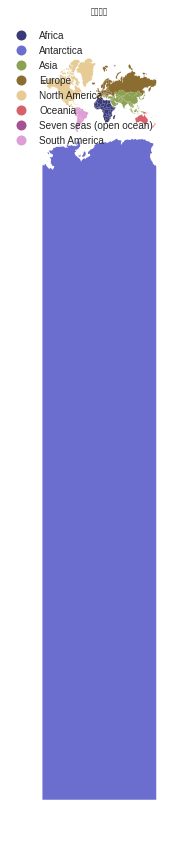

In [29]:
ax = countries_mercator.plot(
    figsize = (15, 15), column = "continent", cmap = 'tab20b', legend = True, categorical = True
)

ax.set_title("세계지도")
ax.set_axis_off()
plt.show()

## 좌표계 x, y행 모두 다른 좌표계로 변경하는 방법

 우리나라 좌표계는 일반저그올 wgs84 좌표계(epsg:4326)를 사용한다. epsg:5179, TM128 등 다른 좌표계에서 epsg:4326 좌표계로 변경하고 싶은경우 어떻게 하는지 알아보자.

 `pyproj`를 임포트 후, transform 파라미터에 변경전 좌표계, 변경하고자하는 좌표계, x값,  y값을 넣어주면 된다.

In [30]:
from pyproj import Proj, transform

epsg5179 = Proj(init = 'epsg:5179')
wgs84 = Proj(init = 'epsg:4326')

x1, y1 = transform(epsg5179, wgs84, 963775, 1941125)

print('변경 후: ', x1, y1)

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  


변경 후:  127.09034113990917 37.46863143276325


In [31]:
# TM128은 직접 인자를 넣어주어야 한다.

from pyproj import Proj, transform

TM128 = {'proj' : 'tmerc', 'lat_0' : '38N', 'lon_0' : '128E', 'ellps' : 'bessel', 'x_0' : '400000', 'y_0' : '600000',
         'k' : '0.9999', 'towgs84' : '-146.43,507.89,681.46'}

wgs84 = Proj(init = 'epsg:4326')

transform(Proj(**TM128), wgs84, 963775, 1941125)

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.


(135.8343159465618, 49.808191831933954)

In [32]:
import pandas as pd

files = pd.DataFrame([{'X': 963775, 'Y' : 1941125}, {'X' : 974213, 'Y':1958312},{'X':978231, 'Y':1942235}])
files.head()

,X,Y
0,963775,1941125
1,974213,1958312
2,978231,1942235


In [33]:
files['trans_X'], files['trans_Y'] = transform(Proj(**TM128), wgs84, files['X'].tolist(), files['Y'].tolist())
files.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  """Entry point for launching an IPython kernel.


,X,Y,trans_X,trans_Y
0,963775,1941125,135.834316,49.808192
1,974213,1958312,136.003361,49.951363
2,978231,1942235,136.034857,49.804371


# 공간 데이터 결합(Spatial Join)

공간결합이란, 두 공간 데이터프레임을 결합하는데,  key값이 아닌 위치정보에 따라 결합(overlay)해 주는 방식이다.

- `gpd.overlay` : 두 공간데이터의 위치정보(geometry)를 연산
- `pd.merge` : 두 데이터프레임을 동일한 key값에 대하여 결합



- 법정동 경계 : polygon
- 시군구 경계 : polygon
- 소방서 위치 : point

In [34]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
from fiona.crs import from_string

epsg4326 = from_string("+proj=longlat +ellps=WGS84 +no_defs")
epsg5179 = from_string("+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs")

seoul_bjd = gpd.GeoDataFrame.from_file('/content/drive/MyDrive/geodata/TL_SCCO_EMD.shp', encoding = 'cp949')
seoul_bjd.crs = epsg5179
seoul_sig = gpd.GeoDataFrame.from_file('/content/drive/MyDrive/geodata/TL_SCCO_SIG.shp', encoding = 'cp949')
seoul_sig.crs = epsg5179

pt_119 = pd.read_csv("/content/drive/MyDrive/geodata/서울시 안전센터관할 위치정보 (좌표계_ WGS1984).csv", encoding = 'cp949', dtype = str)
pt_119['경도'] = pt_119['경도'].astype(float)
pt_119['위도'] = pt_119['위도'].astype(float)
pt_119['geometry'] = pt_119.apply(lambda row : Point([row['경도'], row['위도']]), axis = 1)
pt_119 = gpd.GeoDataFrame(pt_119, geometry = 'geometry', crs = epsg4326)
pt_119 = pt_119.to_crs(epsg5179)

/usr/local/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [35]:
pt_119

,고유번호,센터ID,센터명,위도,경도,geometry
0,21,1121101,양천119안전센터,37.527161,126.869452,POINT (944285.708 1947726.391)
1,22,1122101,신내119안전센터,37.610246,127.096473,POINT (964384.657 1956833.993)
2,42,1115104,서초119안전센터,37.487773,127.017145,POINT (957313.294 1943279.263)
3,3,1106102,이촌119안전센터,37.527841,126.958318,POINT (952138.241 1947752.947)
4,4,1106104,후암119안전센터,37.544896,126.981242,POINT (954174.229 1949633.598)
...,...,...,...,...,...,...
112,117,1105105,금호119안전센터,37.545841,127.024530,POINT (957998.796 1949718.266)
113,106,1114401,삼성119안전센터,37.510765,127.056252,POINT (960782.611 1945813.139)
114,107,1114103,영동119안전센터,37.520161,127.027564,POINT (958252.454 1946867.912)
115,108,1111105,수락119안전센터,37.675376,127.066846,POINT (961803.081 1964071.479)


# 공간결합(gpd.sjoin)

공간 결합은 Geopandas의 `sjoin`함수를 활용하며 입력값들은 다음과 같다.

`gpd.sjoin(left_df, right_df, how = 'inner', op = 'intersects')`

- `left_df`, `right_df` : 결합할 두 공간데이터프레임 객체
- `how` : 결합할 데이터프레임의 기준(`left`, `right`, `inner`, `outer`)
- `op` : 결합할 공간연산 방식(`within`, `intersects`, `contains`)

다른것은 Pandas의 merge와 동일하지만 key값으로 매칭하던 `on` 대신 공간 결합을 위한 연산방법으로 `op`를 활용한다.

3가지 방식을 제공하는데 내부에 있는지(`within`, `contains`), 교차하는지(`intersects`)로 사용할 수 있다.

`within`과 `contain`은 동일한 연산이며 기준이 다를 뿐인다.

`a.contains(b) == b.within(a)`로 표현할 수 있다.

## Point와 Polygon 결합



In [37]:
!pip install rtree

In [38]:
result = gpd.sjoin(seoul_sig, pt_119, how = 'left', op = 'intersects')
result.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,index_right,고유번호,센터ID,센터명,위도,경도
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",6,6,1103108,종로119안전센터,37.579479,126.991009
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",5,5,1103104,신교119안전센터,37.580398,126.964577
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",8,8,1103105,연건119안전센터,37.580569,126.998178
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",7,7,1103102,세종로119안전센터,37.581958,126.976747
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",99,93,1103106,신영119안전센터,37.608680,126.967890


`sjoin`은 이렇게 Polygon에 포함된 Point객체들을 매칭하는 용도로 가장 많이 활용된다.



In [39]:
# `contain`과 `within`의 차이

result_test = gpd.sjoin(seoul_sig, pt_119, how = 'left', op = 'within')
result_test.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,index_right,고유번호,센터ID,센터명,위도,경도
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",NaN,NaN,NaN,NaN,NaN,NaN
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",NaN,NaN,NaN,NaN,NaN,NaN
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1...",NaN,NaN,NaN,NaN,NaN,NaN
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1...",NaN,NaN,NaN,NaN,NaN,NaN
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1...",NaN,NaN,NaN,NaN,NaN,NaN


`op = 'within'` 으로 주면 매칭이 하나도 되지 않는다.
그 이유는 설명한 것처럼 기준이 다르기 때문인데, 아래와 같이 변경하면 된다.

- `gpd.sjoin(pt_119, seoul_sig, how = 'left', op = 'within')` : 두 데이터의 위치를 바꾸거나
- `gpd.sjoin(soul_sig, pt_119, how = 'right', op = 'within')` : 기준을 바꾸면 된다.

## Polygon과 Polygon 결합

Polygon끼리도 결합방식은 동일하지만 주의해야할 경우!

Polygon자체가 이빨이 딱 안맞는 경우가 많아서, Polygon끼리 `sjoin`을 할때 포함(within, contains) 여부나 교차하는지(intersects)를 정확하게 판단하기가 어렵다.

서울시 시군구 법정동 경계를 결합한다고 했을때 포함(contains)되는 경우와 교차(intersects)되는 경우를 비교해보자. 

시군구 법정동 경계를 공간결합 하였으며, 종로구(11110)만 필터링하여 결과를 시각화해보자.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


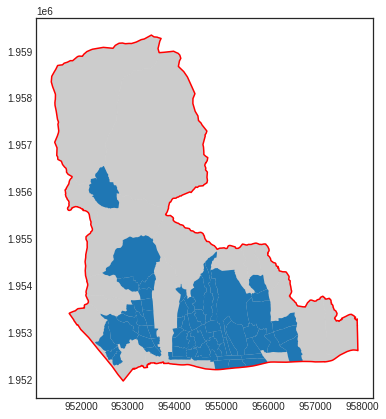

In [42]:
# 1. 포함(contains)

res1 = gpd.sjoin(seoul_sig, seoul_bjd, how = 'left', op = 'contains')
bjd_list = res1[res1['SIG_KOR_NM'] == '종로구']['EMD_CD'].tolist()

ax = seoul_sig[seoul_sig['SIG_CD'] == '11110'].boundary.plot(figsize = (7, 7), color = 'red')
seoul_bjd[seoul_bjd['EMD_CD'].str.startswith('11110')].plot(ax = ax, color = 'black', alpha = .2)
seoul_bjd[seoul_bjd['EMD_CD'].isin(bjd_list)].plot(ax = ax)

plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


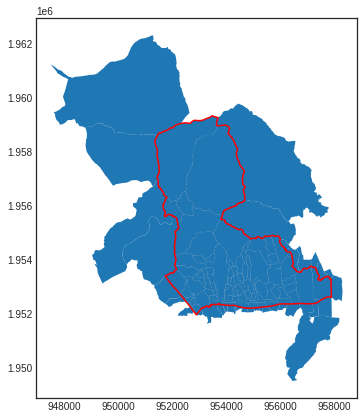

In [44]:
# 2. 교차(intersects)

res2 = gpd.sjoin(seoul_sig, seoul_bjd, how = 'left', op = 'intersects')
bjd_list = res2[res2['SIG_KOR_NM'] == '종로구']['EMD_CD'].tolist()

ax = seoul_sig[seoul_sig['SIG_CD'] == '11110'].boundary.plot(figsize = (7, 7), color = 'red')
seoul_bjd[seoul_bjd['EMD_CD'].str.startswith('11110')].plot(ax = ax, color = 'black', alpha = .2)
seoul_bjd[seoul_bjd['EMD_CD'].isin(bjd_list)].plot(ax = ax)

plt.show()

- 빨강 : 종로구의 시군구 경계
- 파랑 : 결합된 종로구의 법정동 경계
- 회색 : 원래 종로구의 법정동 경계

위 그림과 같이 종로구(Polygon) 내의 법정동(Polygon)을 공간결합을 통해 매칭하려고 했을때, 경계가 정확히 일치하지 않기 때문에 발생하는 오차들이다.

> 즉, 이 경우는 공간결합이 아닌 시군구코드(SIG_CD)를 key값으로 merge하는 것이 적절하다.

하지만, 이 경우도 시군구경계에 buffer를 줘서 경계를 살짝 넓힌 다음 포함(contains) 결합을 통해 추출해낼 순 있다.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


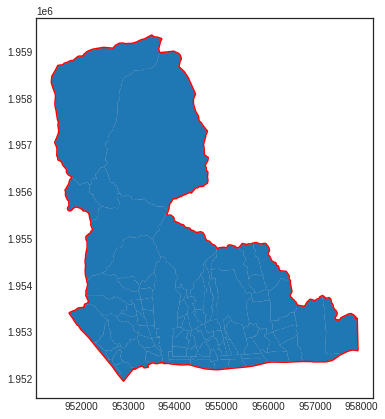

In [46]:
# 3. buffer를 통해 수정

seoul_sig['geometry'] = seoul_sig['geometry'].buffer(5)
res2 = gpd.sjoin(seoul_sig, seoul_bjd, how = 'left', op = 'contains')
bjd_list = res2[res2['SIG_KOR_NM'] == '종로구']['EMD_CD'].tolist()

ax = seoul_sig[seoul_sig['SIG_CD'] == '11110'].boundary.plot(figsize = (7, 7), color = 'red')
seoul_bjd[seoul_bjd['EMD_CD'].str.startswith("11110")].plot(ax = ax, color = 'black', alpha = .2)
seoul_bjd[seoul_bjd['EMD_CD'].isin(bjd_list)].plot(ax = ax)

plt.show()

이렇게 공간 정보 데이터는 단순히 값(value)만 확인하는 것이 아니라, 공간 객체(geometry)간의 관계와 오류를 세부적으로 파악할 수 있고 적절하게 변형하거나 조합해야 하는 경우가 많다.

# 공간정보 데이터를 자유롭게 변형, 가공, 처리하기

In [59]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

plt.rc('font', family='NanumBarunGothic') 


seoul_area = gpd.GeoDataFrame.from_file("/content/drive/MyDrive/geodata/LARD_ADM_SECT_SGG_11.shp", encoding='cp949')
pt_119 = pd.read_csv("/content/drive/MyDrive/geodata/서울시 안전센터관할 위치정보 (좌표계_ WGS1984).csv", encoding = 'cp949', dtype = str)
pt_119['경도'] = pt_119['경도'].astype(float)
pt_119['위도'] = pt_119['위도'].astype(float)
pt_119['geometry'] = pt_119.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
pt_119 = gpd.GeoDataFrame(pt_119, geometry='geometry')
pt_119.crs = {'init':'epsg:4326'}
pt_119 = pt_119.to_crs({'init':'epsg:5179'})

## 1. 객체 속성
1. `area` : 면적 계산
2. `length` : 길이 계산
3. `boundary` : 테두리(LineString객체)
4. `exterior` : 테두리(LinearRing객체)
5. `centroid` : 무게중심점
6. `xy` : 좌표 반환(array, tuple 객체)
7. `coords` : 좌표 반환(shapely.coords 객체)
8. `is_valid` : 도형 유효성 검사(boolean)
9. `geom_type` : 공간 객체 타입

In [50]:
# Area

seoul_area.geometry.area.head()

0    2.453758e+07
1    3.383061e+07
2    3.946631e+07
3    4.685083e+07
4    2.954112e+07
dtype: float64

In [51]:
# length

seoul_area.geometry.length.head()

## Polygon의 length는 테두리의 길이(=둘레)가 될 것

0    24029.227412
1    30532.219899
2    35504.681042
3    43978.564653
4    27448.698426
dtype: float64

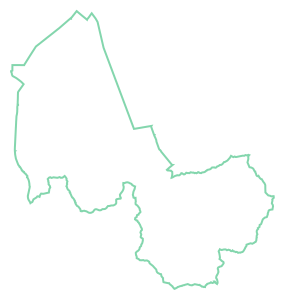

In [54]:
# boundary

seoul_area.geometry[3].boundary

## boundary는  polygon객체의 테두리로 Linestring 객체를 반환한다.

In [55]:
# centroid

seoul_area.geometry.centroid.head()

0    POINT (968820.295 1950182.074)
1    POINT (965998.688 1945219.460)
2    POINT (961369.995 1944245.952)
3    POINT (958548.929 1941666.568)
4    POINT (950951.582 1941050.947)
dtype: geometry

In [56]:
# xy와 coords

print(pt_119['geometry'][0].xy)
print(pt_119['geometry'][0].coords)
print(list(pt_119['geometry'][0].coords))

## xy와 coords는 사실 shapely의 공간 객체인 Point와 LineString의 속성이기 때문에 GeoDataFrame과 GeoSeries에 바로 적용할 수 없다.
## 또한 Polygon의 좌표를 뽑기 위해선 boundary로 Line객체를 만들고 속성을 뽑아야 한다.

(array('d', [188390.6362569387]), array('d', [447221.5961014573]))
[(188390.6362569387, 447221.5961014573)]


In [57]:
# is_valid

seoul_area.geometry.is_valid.head()

## is_valid는 도형이 유효한지를 검사할 때 사용한다. 
## 공간데이터는 좌표나 제작 출처에 따라서 조금씩 모양이 다르기도하고, 
## 삐져나오거나 마감처리가 잘 안되어 있거나 한 경우가 있는데 처리하지 않으면 에러가 난다.

## index1의 객체가 유효하지 않다고 나와있다.

0     True
1    False
2     True
3     True
4     True
dtype: bool

## 공간 관계

1. `within` : 포함되는지 여부
2. `contain` : 포함하고 있는지 여부
3. `intersects` : 교차하는지 여부(경계에 닿아 있기만 해도됨)
4. `crosses` : 교차하는지 여부(내부를 지나야 함)
5. `distance` : 두 공간 사이의 직선(최단)거리를 계산

### within과 contain

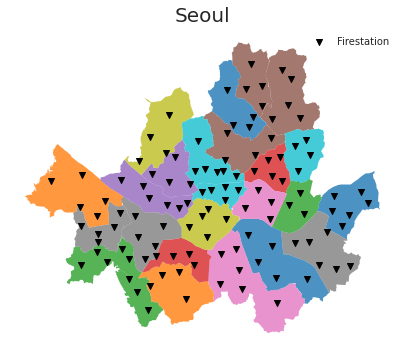

In [61]:
ax = seoul_area.plot(column = 'SGG_NM', figsize = (7, 7), alpha = .8)
pt_119.plot(ax = ax, marker = 'v', color = 'black', label = 'Firestation')
ax.set_title("Seoul", fontsize = 20)
ax.set_axis_off()
plt.legend()
plt.show()

`within`과 `contains`는 어법이 반대인 것만 빼면 같은 함수라 할 수 있고, 같은 결과를 반환한다.

In [63]:
# 고덕119안전센터는 강동구 안에 있다.
print(pt_119.geometry[17].within(seoul_area.geometry[0]))

# 강동구 안에는 고덕119안전센터가 있다.
print(seoul_area.geometry[0].contains(pt_119.geometry[17]))

True
True


두 함수 모두 1:1 또는 N:1 관계만 입력 가능하고 1:N은 입력이 불가능하다. 따라서 경우에 따라 두 함수 모두 필요할 때가 있다.

- 서울시 119안전센터(N) 중, 강동구(1)에 포함되는 곳은? : `within`

- 서울시 시군구(N) 중, 고덕안전센터(1)를 포함하는 곳은? : `contains`

### intersects, crosses

In [64]:
# 강동구와 송파구는 맞닿아 있다.
print(seoul_area.geometry[1].intersects(seoul_area.geometry[1]))

# 하지만 cross 되지는 않는다.
print(seoul_area.geometry[1].crosses(seoul_area.geometry[1]))

True
False


이러한 공간 데이터 간의 관계를 이용해서 다양한 활용이 가능하다.

예를들어, 서울시 양천구 내의 소방안전센터 정보를 인덱싱해보자.

In [65]:
yangcheon = seoul_area.loc[seoul_area['SGG_NM'] == '양천구', 'geometry'].iloc[0]
select_pt = pt_119[pt_119.within(yangcheon)] # 양천구 안에 있는 소방안전센터
select_pt # 총 6개의 안전세터가 존재

,고유번호,센터ID,센터명,위도,경도,geometry
0,21,1121101,양천119안전센터,37.527161,126.869452,POINT (944285.708 1947726.391)
24,31,1121105,신트리119안전센터,37.513474,126.851577,POINT (942695.842 1946218.671)
47,1,1121102,신정119안전센터,37.520698,126.851035,POINT (942653.462 1947020.444)
66,65,1121104,신월119안전센터,37.528035,126.831056,POINT (940893.780 1947846.771)
74,74,1121103,목동119안전센터,37.540990,126.876401,POINT (944909.865 1949256.533)
101,96,1117104,발산119안전센터,37.546084,126.829698,POINT (940788.072 1949850.110)


### distance

distance는 점과 다각형, 라인 등 두 공간 사이의 직선거리를 계산해준다.

위에서 찾은 안전센터중, 양천안전센터와 발산안전센터 사이의 거리를 구해보자.

In [67]:
# distance

dist = select_pt['geometry'].loc[0].distance(select_pt['geometry'].loc[101])

print("약 %s m" % round(dist))

약 4092 m


## 3. 공간 연산 및 변형

1. `buffer` : 주어진 거리 내의 모든 점을 이어 Polygon을 만들고 주어진 거리만큼 확장한다.
2. `envelope` : Polygon을 감싸는 가장 작은 사각형 Polygon 객체를 만든다.
3. `convexhull` : Polygon에 대하여 convex-hull(블록껍질)을 만든다.
4. `unary_union` : 여러 공간 데이터의 합집합을 구한다.
5. `dissolve` : 합집합을 구한다(groupby 기능이 포함)
6. `overlay` : 합집합, 차집합, 교집합 등 공간 연산 기능을 제공한다.

`buffer` 는 객체 타입에 상관없이 해당 객체를 감싸는 원형의 반경을 생성해내고, `envelope`은 Polygon 타입에 대하여 사각형 형태의 반경을 만들어낸다.

### buffer, envelope

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


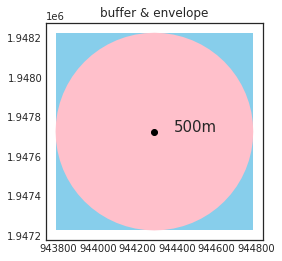

In [68]:
yangcheon = pt_119.geometry.iloc[0]

ax = gpd.GeoSeries(yangcheon.buffer(500).envelope).plot(color = 'skyblue') # envelope
gpd.GeoSeries(yangcheon.buffer(500)).plot(color = 'pink', ax = ax) # buffer
gpd.GeoSeries(yangcheon).plot(figsize = (6, 6), color = 'black', ax = ax)

plt.title("buffer & envelope")
plt.text(yangcheon.x+100, yangcheon.y, "500m", fontsize = 15)
plt.show()

따라서 위와 같은 관계이며, Point에 대하여 500m에 해당하는 사각형 반경을 만들었다고 볼 수 있다.

초기점에 대하여 grid를 만드는데 유용하게 사용된다.


추가적으로, 위에서 `is_valid`를 통해 송파구가 유효하지 않은 객체임을 확인했다. shapefile의 경우 면이나 선의 경계 등이 깔끔하게 정리되어 있지 않은 경우가 많다. 이를 Topology Error라고 부르며, 다양한 처리방식이 존재한다.

In [69]:
invalid_area = seoul_area.iloc[[1]]

print(invalid_area.is_valid)
print(invalid_area.buffer(0).is_valid)  ## buffer로 보정 한 후, valid한 데이터를 확인

1    False
dtype: bool
1    True
dtype: bool


### convexhull

`convexhull`이란 2차원 평면상에 여러개의 점이 있을 때, 일부를 이용하여 내부에 모든 점을 포함시키는 다각형을 만드는 것을 의미한다.

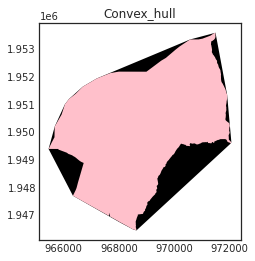

In [70]:
# 강동구 Polygon으로 확인

gangdong = seoul_area.iloc[[0]]

ax = gangdong.convex_hull.plot(color = 'black')
gangdong.plot(ax = ax, figsize = (5, 5), color = 'pink')
plt.title('Convex_hull')
plt.show()